In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler, robust_scale

In [7]:
#simple_df = pd.DataFrame({'studemts':['Alice','Bob','Chang','Pallavi','Smith'],'scores':[40, 42, 44, 46, 49]})

In [8]:
#simple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
studemts    5 non-null object
scores      5 non-null int64
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [9]:
#simple_df.head()

,studemts,scores
0,Alice,40
1,Bob,42
2,Chang,44
3,Pallavi,46
4,Smith,49


In [10]:
simple_df.describe()

,scores
count,5.00000
mean,44.20000
std,3.49285
min,40.00000
25%,42.00000
50%,44.00000
75%,46.00000
max,49.00000


In [11]:
df = pd.read_csv('Absenteeism_at_work.csv')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [12]:
scaled_df = pd.DataFrame(scale(df), columns=df.columns)
scaled_df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.19285,0.851673,-0.019046,0.775932,-0.219511
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,...,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.56624,1.473056,0.975828,1.009438,-0.519767
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,...,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.56624,0.774000,-0.350671,1.009438,-0.369639
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.56624,-0.857131,-0.682295,-0.625100,-0.219511
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.19285,0.851673,-0.019046,0.775932,-0.369639


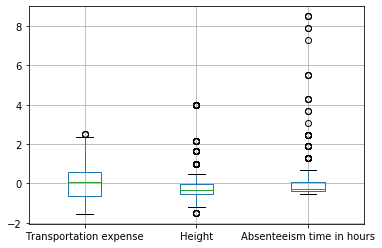

In [14]:
scaled_df.boxplot(column=['Transportation expense','Height','Absenteeism time in hours'])
plt.show()

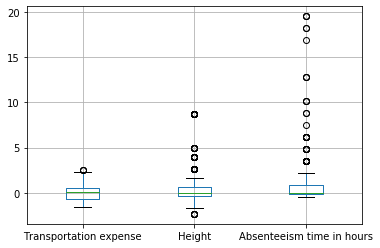

In [16]:
#SKlearn robust_scale

scaled_df['Transportation'] = robust_scale(df['Transportation expense'])

scaled_df['Height'] = robust_scale(df['Height'])

scaled_df['Absenteeism time in hours'] = robust_scale(df['Absenteeism time in hours'])

scaled_df.boxplot(column=['Transportation expense','Height','Absenteeism time in hours'])
plt.show()

In [17]:
robust_scaler = RobustScaler(copy=True, with_centering=True, with_scaling=True)
robust_scaler

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

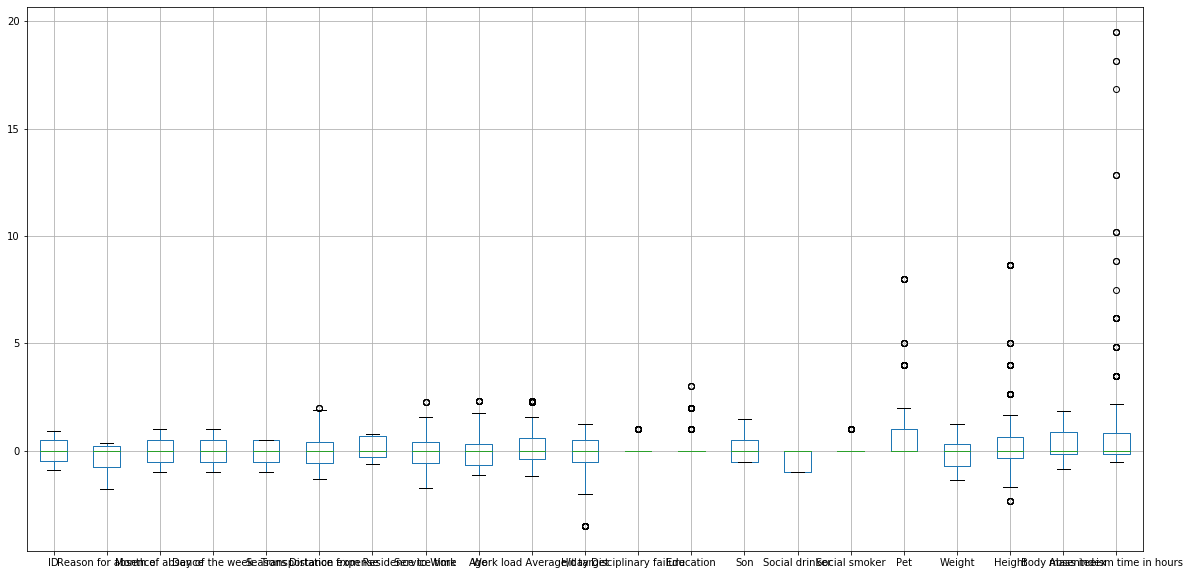

In [18]:
robust_scale_array = robust_scaler.fit_transform(df)
robust_scale_df = pd.DataFrame(robust_scale_array, columns=df.columns)
robust_scale_df.boxplot(figsize=(20,10))
plt.show()